<a href="https://colab.research.google.com/github/Nargis45/Data_Analysis/blob/main/cubic_zirconia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cubic_zirconia.csv')

In [134]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [129]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [63]:
df.shape

(26967, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [65]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

**FINDING THE NULL VALUES USING HEATMAP**

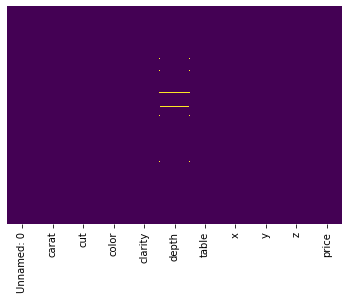

In [66]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**FINDING THE DATA COUNT OF CUT COLUMN USING COUNT PLOT**

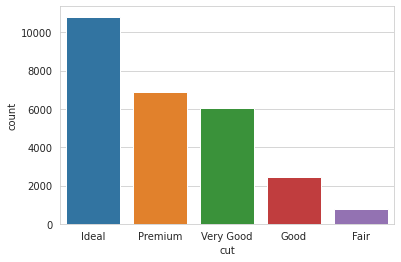

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='cut',data=df)

**FINDING THE EXACT COUNT OF DATA OF CUT COLUMN***

In [68]:
cut = pd.DataFrame(df['cut'].value_counts())
cut.reset_index()

,index,cut
0,Ideal,10816
1,Premium,6899
2,Very Good,6030
3,Good,2441
4,Fair,781


**FINDING THE PERCENTAGE OF DIFFERENT DATA IN CUT COLUMN**

In [69]:
cut = cut.rename(columns = {'index':'cut', 'cut':'count'})
for c in cut:
    cut['per'] = (cut['count'] / df.shape[0] )*100

In [74]:
cut

,count,per
Ideal,10816,40.108280
Premium,6899,25.583120
Very Good,6030,22.360663
Good,2441,9.051804
Fair,781,2.896132


**REPRESENTIONG THE PERCENTAGE VALUE OF DIFFERENT DATA OF CUT COLUMN USING PIE CHART**

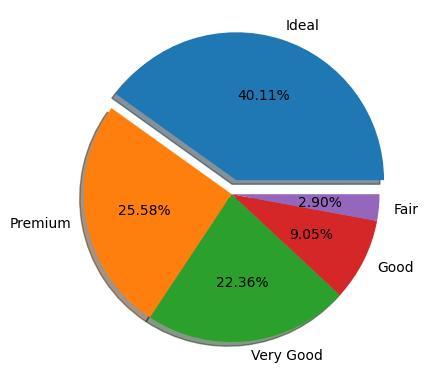

In [137]:
explode = [0.1,0,0,0,0]
label=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
pie = plt.pie(x = 'per' , 
              autopct = '%1.2f%%', 
              explode = explode,
              data = cut,
              labels = label,
              shadow=True)

**USING UNIVARIATE ANALYSIS TO REPRESENT CARAT VALUE OF THE FIRST THREE MAXIMUM COUNT VALUE OF CUT COLUMN**

In [126]:
df_ideal=df.loc[df['cut']=='Ideal']
df_premium=df.loc[df['cut']=='Premium']
df_very_good=df.loc[df['cut']=='Very Good']

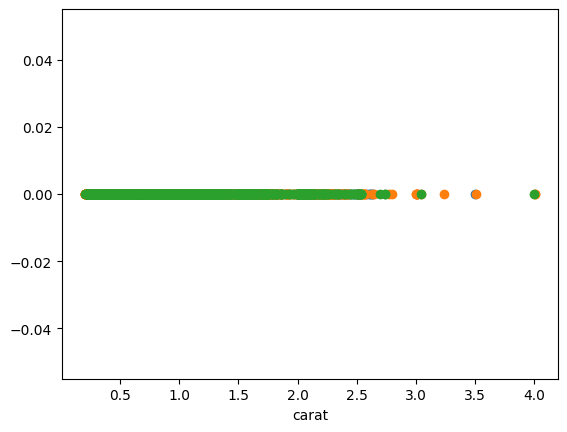

In [133]:
plt.plot(df_ideal['carat'],np.zeros_like(df_ideal['carat']),'o')
plt.plot(df_premium['carat'],np.zeros_like(df_premium['carat']),'o')
plt.plot(df_very_good['carat'],np.zeros_like(df_very_good['carat']),'o')
plt.xlabel('carat')
plt.show()

**USING BIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


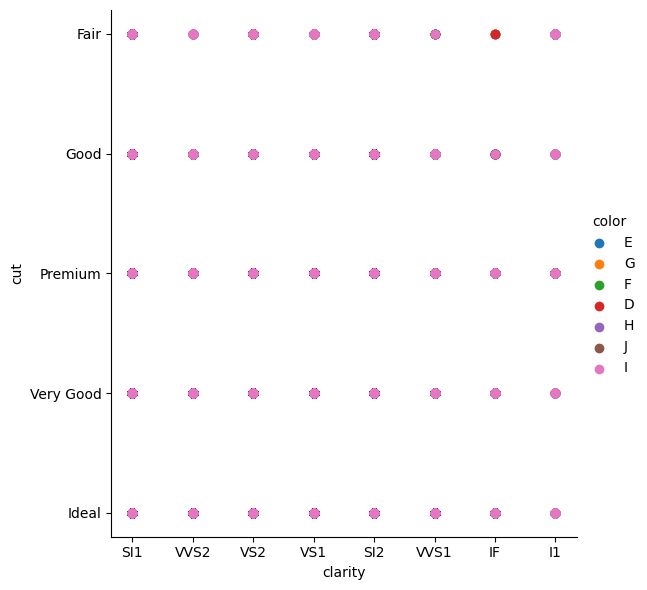

In [121]:
sns.FacetGrid(df,hue='color',size=6).map(plt.scatter, 'clarity', 'cut').add_legend();

**FINDING THE RANGE OF NULL VALUES OF DEPTH COLUMN**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


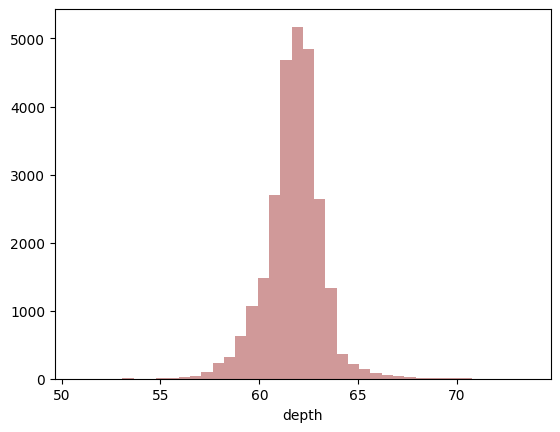

In [87]:
sns.distplot(df['depth'].dropna(), kde=False, color='darkred', bins=40)

**PLOTTING DEPTH VS CUT TO SEE THE FIND THE MEAN VALUE OF DEPTH COLUMN AGAINST CUT COLUMN**

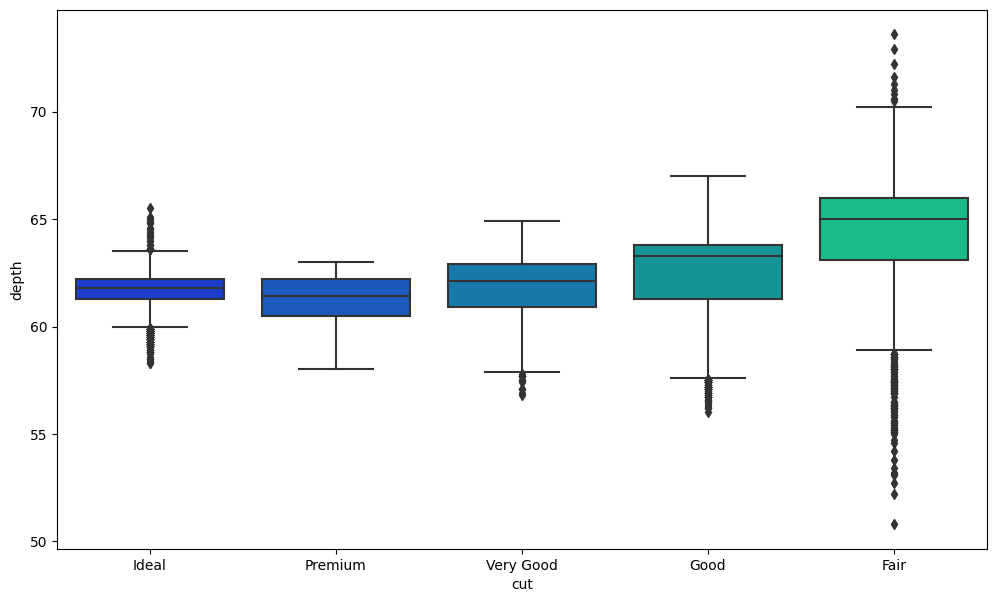

In [88]:
plt.figure(figsize=(12,7))
sns.boxplot(x='cut', y='depth', data=df, palette='winter')

**REPLACING THE NULL VALUES OF DEPTH COLUMN WITH THE MEAN VALUE OF DIFFERENT DATA OF CUT COLUMN**

In [89]:
def depth_fill(cols):
  depth=cols[0]
  cut=cols[1]
  if pd.isnull(depth):
    if cut=='Ideal':
      return 62
    elif cut=='Premium':
      return 61
    elif cut=='Very Good':
      return 63
    elif cut=='Good':
      return 64
    else:
      return 65
  else:
    return depth

In [90]:
df['depth']=df[['depth', 'cut']].apply(depth_fill, axis=1)

**HEATMAP WITH NO NULL VALUES**

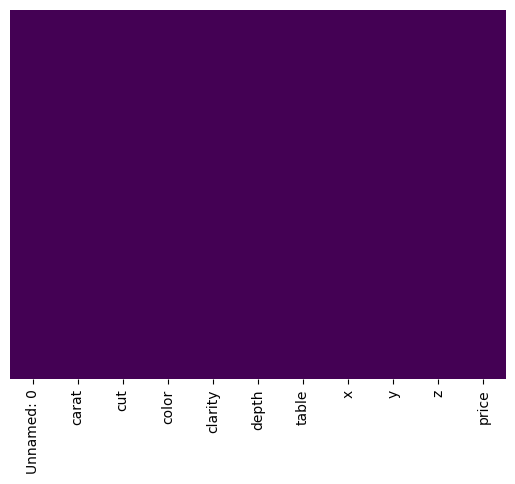

In [91]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


**FINDING THE CORRELATION BETWEEN NUMERICAL VARIABLES**

In [96]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.034679,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.034679,1.000000,-0.290674,-0.018310,-0.024075,0.098357,-0.003281
table,0.181685,-0.290674,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018310,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024075,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.098357,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.003281,0.126942,0.886247,0.856243,0.850536,1.000000


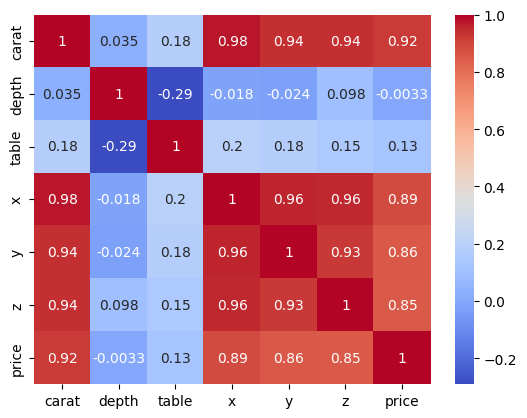

In [103]:
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm')

**USING MULTIVARIATE ANALYSIS TO REPRESENT THE PLOTS OF NUMERICAL VARIABLES WITH THE HELP OF CATEGORICAL VARIABLE(cut) TO DISTINGUISH PROPERLY**

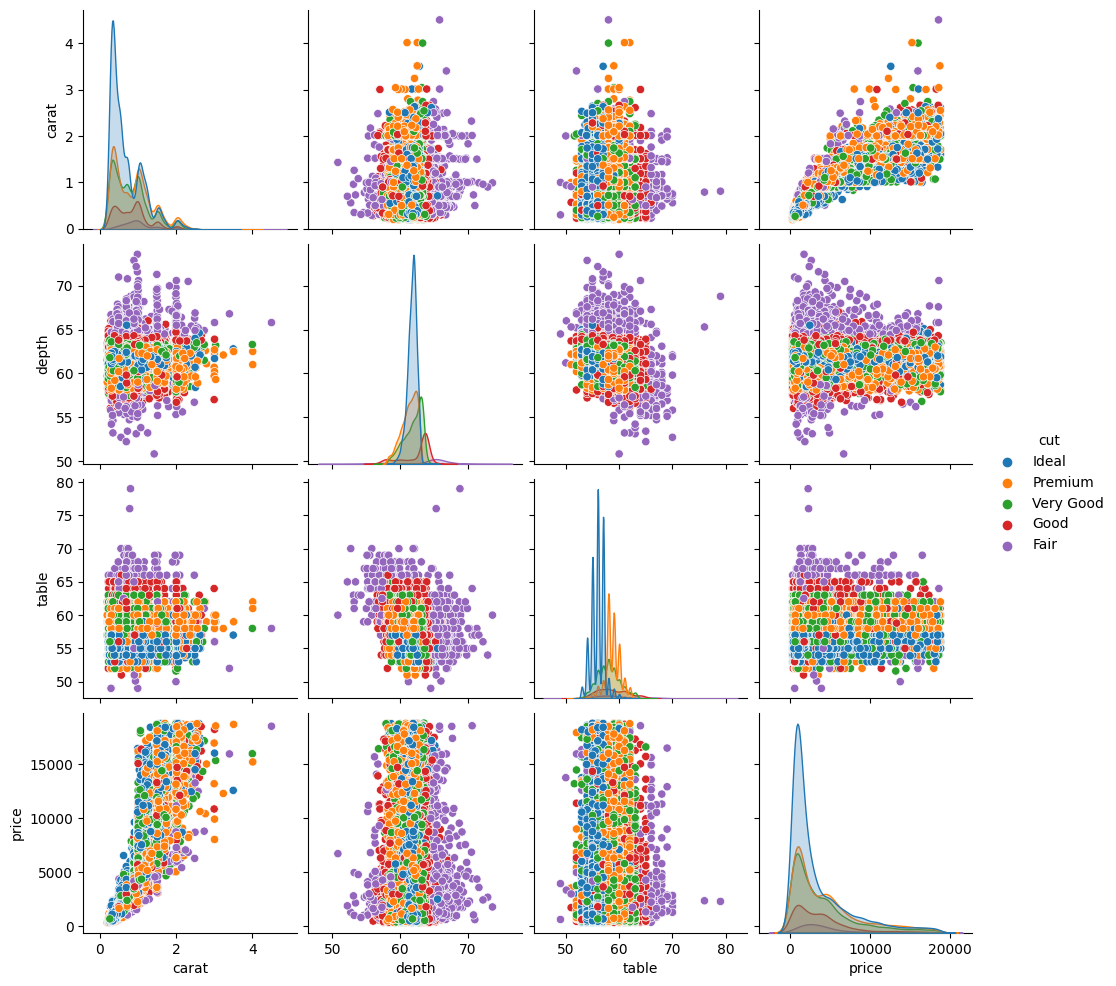

In [138]:
value=['carat','depth', 'table','price','cut']
df1 = df.loc[:,value]
sns.pairplot(data =df1, hue='cut')